3250 Foundations of Data Science Jan-April 2020 <br>
Group 7 <br>
Member: Albert Mendoza <br>
Prof: Irina Sedenko

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Analysis of Canadian Immigrants from 1980-2019

In [2]:
#load the dataset
df = pd.read_csv("cleanedcanadaimmigration.csv", index_col = "Country")
df

Region              Status  1980  \
Country                                                                     
Afghanistan                                Asia  Developing regions    16   
Albania                                  Europe   Developed regions     1   
Algeria                                  Africa  Developing regions    80   
American Samoa                          Oceania  Developing regions     0   
Andorra                                  Europe   Developed regions     0   
...                                         ...                 ...   ...   
Venezuela       Latin America and the Caribbean  Developing regions   103   
Vietnam                                    Asia  Developing regions  1191   
Yemen                                      Asia  Developing regions     1   
Zambia                                   Africa  Developing regions    11   
Zimbabwe                                 Africa  Developing regions    72   

                1981  1982  1983  1984  1985  1986  1987  ...  2010  2011  \
Country                                                   ...               
Afghanistan       39    39    47    71   340   496   741  ...  1758  2203   
Albania            0     0     0     0     0     1     2  ...   561   539   
Algeria           67    71    69    63    44    69   132  ...  4752  4325   
American Samoa     1     0     0     0     0     0     1  ...     0     0   
Andorra            0     0     0     0     0     2     0  ...     0     0   
...              ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
Venezuela        117   174   124   142   165   179   229  ...   998  1452   
Vietnam         1829  2162  3404  7583  5907  2741  1406  ...  1942  1723   
Yemen              2     1     6     0    18     7    12  ...   211   160   
Zambia            17    11     7    16     9    15    23  ...   102    69   
Zimbabwe         114   102    44    32    29    43    68  ...   494   434   

                2012  2013    2014  2015  2016  2017  2018  2019  
Country                                                           
Afghanistan     2635  2004  1943.0  1882  1596  1187  1342  1977  
Albania          620   603   603.5   604   359   229   454   631  
Algeria         3774  4331  5013.0  5695  2468  2004  3340  4243  
American Samoa     0     0     0.0     0     1     0     0     1  
Andorra            1     1     0.5     0     0     1     1     1  
...              ...   ...     ...   ...   ...   ...   ...   ...  
Venezuela       1373  1022  1303.0  1584   712   588  1277  1690  
Vietnam         1731  2112  2035.5  1959  1163   810  1769  2593  
Yemen            174   217   199.0   181   115    80   216   230  
Zambia            46    59    94.0   129    78    54    75   104  
Zimbabwe         437   407   515.5   624   362   235   361   413  

[174 rows x 42 columns]

In [3]:
#make a total column
df = df.astype({"2014":int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Zimbabwe
Data columns (total 42 columns):
Region    174 non-null object
Status    174 non-null object
1980      174 non-null int64
1981      174 non-null int64
1982      174 non-null int64
1983      174 non-null int64
1984      174 non-null int64
1985      174 non-null int64
1986      174 non-null int64
1987      174 non-null int64
1988      174 non-null int64
1989      174 non-null int64
1990      174 non-null int64
1991      174 non-null int64
1992      174 non-null int64
1993      174 non-null int64
1994      174 non-null int64
1995      174 non-null int64
1996      174 non-null int64
1997      174 non-null int64
1998      174 non-null int64
1999      174 non-null int64
2000      174 non-null int64
2001      174 non-null int64
2002      174 non-null int64
2003      174 non-null int64
2004      174 non-null int64
2005      174 non-null int64
2006      174 non-null int64
2007      174 non-null int64
2008      174

# Make Descriptive inferences on status per country

In [4]:
#separate by Status and made Total sum per year

dfgrouped = df.groupby(["Status"]).sum()
dfgroupsum = dfgrouped.pivot_table(columns = "Status")
dfgroupsum["Totalsum"] = dfgroupsum["Developed regions"] + dfgroupsum["Developing regions"]
dfgroupsum


Status  Developed regions  Developing regions  Totalsum
1980                51142               47416     98558
1981                56703               53173    109876
1982                53238               50240    103478
1983                32504               42548     75052
1984                29675               43260     72935
1985                28049               41365     69414
1986                32224               53089     85313
1987                55499               78254    133753
1988                62128               75944    138072
1989                68966               93678    162644
1990                75462              111123    186585
1991                65364              140479    205843
1992                72365              147158    219523
1993                70284              147746    218030
1994                67783              122118    189901
1995                58885              123843    182728
1996                60095              135203    195298
1997                52741              135853    188594
1998                39567              116619    156186
1999                39487              135445    174932
2000                44090              168938    213028
2001                49027              189321    238348
2002                42222              176478    218700
2003                40639              172029    212668
2004                46066              181398    227464
2005                45543              207519    253062
2006                43792              198772    242564
2007                44022              183334    227356
2008                45904              191918    237822
2009                44550              199006    243556
2010                41543              228620    270163
2011                35007              206321    241328
2012                37622              213146    250768
2013                37951              214394    252345
2014                37040              210441    247481
2015                36152              206541    242693
2016                21902              121259    143161
2017                16373               86327    102700
2018                24699              145619    170318
2019                34056              207431    241487

### Plot of Status of Country across the year

Text(0, 0.5, 'Total Citizens')

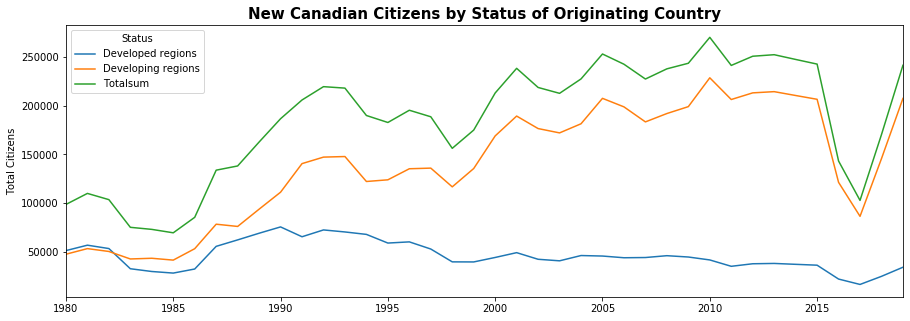

In [5]:
#shows sum per developed and developing regions
#assumming all developed and developing regions are kept constant through time
statusplot = dfgroupsum.plot(figsize = (15,5) )
statusplot.set_title("New Canadian Citizens by Status of Originating Country", fontdict={'fontsize': 15, 'fontweight': 'heavy'})
statusplot.set_ylabel("Total Citizens")

### Plot of region of origin

In [6]:
#make a Dataframe per Region Total from 1980-2019

dfgroupedregion = df.groupby(["Region"])
dfsumregion = dfgroupedregion.sum()
dfsumregion["Total"] = dfsumregion.sum(axis = 1)
dfsumregiontotal = dfsumregion.drop(dfsumregion.iloc[:, 0:40], axis = 1)
dfsumregiontotal

Total
Region                                  
Africa                            775299
Asia                             3970139
Europe                           1498438
Latin America and the Caribbean   863582
Northern America                  273014
Oceania                            63255

In [7]:
dfnewregion = dfsumregion.drop("Total", axis = 1).transpose()
dfnewregion


Region  Africa    Asia  Europe  Latin America and the Caribbean  \
1980      3917   30784   39759                            12775   
1981      4342   34013   44798                            14848   
1982      3797   29877   42718                            16333   
1983      2653   24527   24638                            15115   
1984      2594   27146   22287                            13367   
1985      2595   23711   20841                            14804   
1986      3698   28534   24370                            20730   
1987      7429   42831   46697                            27891   
1988      7477   46646   54725                            21574   
1989      9753   58987   60892                            24682   
1990     10809   71986   68301                            27521   
1991     13921   89307   57937                            36126   
1992     18636   90260   63843                            37075   
1993     16009   98263   60704                            33048   
1994     12633   88477   59990                            20930   
1995     14200   90017   52291                            19763   
1996     14865  102613   52668                            18083   
1997     13544  106070   46260                            16701   
1998     13065   90552   33608                            13499   
1999     15212  106227   32521                            14721   
2000     19169  133862   36836                            16451   
2001     22948  147267   41172                            19538   
2002     20975  136799   35400                            18891   
2003     21342  131055   33058                            19868   
2004     26046  134163   36823                            21654   
2005     25826  158408   34803                            24045   
2006     27649  148129   31774                            23927   
2007     26932  132328   31926                            25017   
2008     28575  138679   32932                            25608   
2009     33374  140668   32823                            25835   
2010     39091  162386   30810                            27895   
2011     34147  146120   24840                            26995   
2012     36451  151539   27118                            26088   
2013     36829  154472   26932                            23836   
2014     38425  147340   27569                            24789   
2015     40039  140227   28225                            25753   
2016     20602   85242   16578                            15235   
2017     18763   55950   12381                            11526   
2018     30623   98048   19460                            16789   
2019     36344  146629   27130                            24256   

Region  Northern America  Oceania  
1980                9378     1945  
1981               10030     1845  
1982                9074     1679  
1983                7100     1019  
1984                6661      880  
1985                6543      920  
1986                7074      907  
1987                7705     1200  
1988                6469     1181  
1989                6790     1540  
1990                5892     2076  
1991                6054     2498  
1992                6842     2867  
1993                7435     2571  
1994                5901     1970  
1995                4890     1567  
1996                5515     1554  
1997                4753     1266  
1998                4437     1025  
1999                5196     1055  
2000                5433     1277  
2001                5604     1819  
2002                4948     1687  
2003                5543     1802  
2004                6990     1788  
2005                8394     1586  
2006                9613     1472  
2007                9463     1690  
2008               10190     1838  
2009                8995     1861  
2010                8142     1839  
2011                7676     1550  
2012                7891     1681  
2013                8501    

Text(0, 0.5, 'Total Citizens')

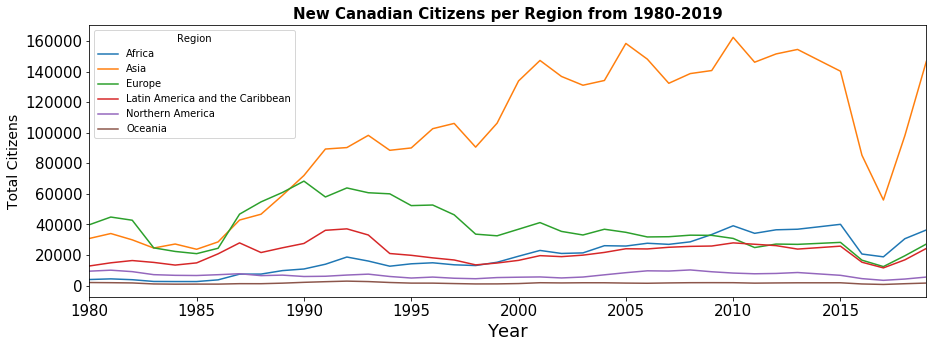

In [8]:
dftotalregiontimeplot = dfnewregion.plot(figsize = (15,5), fontsize = 15)
dftotalregiontimeplot.set_title('New Canadian Citizens per Region from 1980-2019', fontdict={'fontsize': 15, 'fontweight': 'heavy'})
dftotalregiontimeplot.set_xlabel('Year', fontsize=18 )
dftotalregiontimeplot.set_ylabel('Total Citizens', fontsize=14)

Text(0, 0.5, 'Region of the Country of Origin')

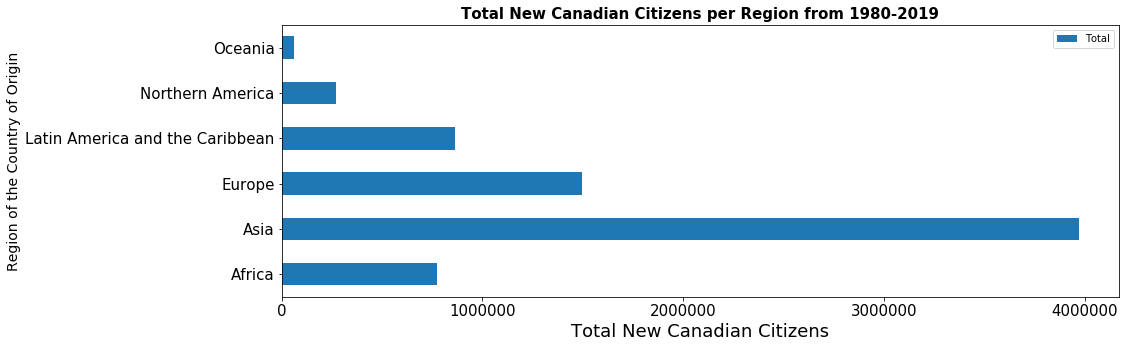

In [9]:
dftotalregionplot = dfsumregiontotal.plot(kind="barh", figsize = (15,5), xticks = (0,1000000,2000000,3000000,4000000), fontsize = 15)
dftotalregionplot.set_title('Total New Canadian Citizens per Region from 1980-2019', fontdict={'fontsize': 15, 'fontweight': 'heavy'})
dftotalregionplot.set_xlabel('Total New Canadian Citizens', fontsize=18)
dftotalregionplot.set_ylabel('Region of the Country of Origin', fontsize=14)

In [10]:
#make a multi-index Dataframe per Status and Region

dfgroupedmulti = df.groupby(["Status","Region"])
dfmulti = dfgroupedmulti.sum()
dfmulti["Total"] = dfmulti.sum(axis = 1)
dfmulti

1980   1981   1982  \
Status             Region                                                 
Developed regions  Asia                               701    756    598   
                   Europe                           39759  44798  42718   
                   Northern America                  9378  10030   9074   
                   Oceania                           1304   1119    848   
Developing regions Africa                            3917   4342   3797   
                   Asia                             30083  33257  29279   
                   Latin America and the Caribbean  12775  14848  16333   
                   Oceania                            641    726    831   

                                                     1983   1984   1985  \
Status             Region                                                 
Developed regions  Asia                               309    246    198   
                   Europe                           24638  22287  20841   
                   Northern America                  7100   6661   6543   
                   Oceania                            457    481    467   
Developing regions Africa                            2653   2594   2595   
                   Asia                             24218  26900  23513   
                   Latin America and the Caribbean  15115  13367  14804   
                   Oceania                            562    399    453   

                                                     1986   1987   1988  \
Status             Region                                                 
Developed regions  Asia                               248    422    324   
                   Europe                           24370  46697  54725   
                   Northern America                  7074   7705   6469   
                   Oceania                            532    675    610   
Developing regions Africa                            3698   7429   7477   
                   Asia                             28286  42409  46322   
                   Latin America and the Caribbean  20730  27891  21574   
                   Oceania                            375    525    571   

                                                     1989  ...    2011  \
Status             Region                                  ...           
Developed regions  Asia                               494  ...    1265   
                   Europe                           60892  ...   24840   
                   Northern America                  6790  ...    7676   
                   Oceania                            790  ...    1226   
Developing regions Africa                            9753  ...   34147   
                   Asia                             58493  ...  144855   
                   Latin America and the Caribbean  24682  ...   26995   
                   Oceania                            750  ...     324   

                                                      2012    2013    2014  \
Status             Region                                                    
Developed regions  Asia                               1214     982     671   
                   Europe                            27118   26932   27569   
                   Northern America                   7891    8501    7583   
                   Oceania                            1399    1536    1217   
Developing regions Africa                            36451   36829   38425   
                   Asia                             150325  153490  146669   
                   Latin America and the Caribbean   26088   23836   24789   
                   Oceania                             282     239     558   

                                                      2015   2016   2017  \
Status             Region                                                  
Developed regions  Asia                                361    238    165   
                   Europe                         

In [11]:
#total per region and Status, drop the rest

dftotal = dfmulti.drop(dfmulti.iloc[:, 0:40], axis = 1)
#dftotal.reset_index(level = "Status")
#dftotal.pivot_table(columns = "Region", index = ("Total","Status"))

Text(0, 0.5, 'Status, Region of the Country of Origin')

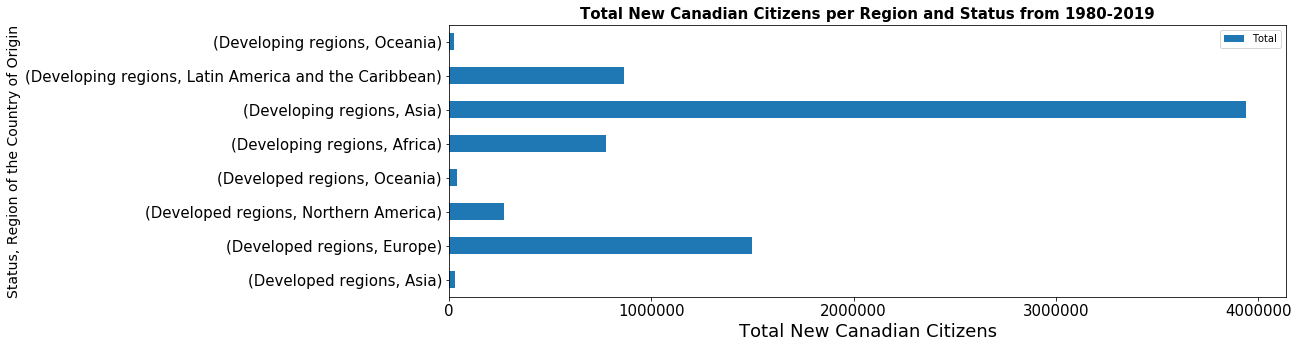

In [12]:
# Horizontal Bar plot of Total New Canadian Citizens per Region and Status
dftotalplot = dftotal.plot(kind="barh", figsize = (15,5), xticks = (0,1000000,2000000,3000000,4000000), fontsize = 15)
dftotalplot.set_title('Total New Canadian Citizens per Region and Status from 1980-2019', fontdict={'fontsize': 15, 'fontweight': 'heavy'})
dftotalplot.set_xlabel('Total New Canadian Citizens', fontsize=18)
dftotalplot.set_ylabel('Status, Region of the Country of Origin', fontsize=14)

# Assess Total per country
    

Text(0.5, 0, 'Total Per Country in Millions')

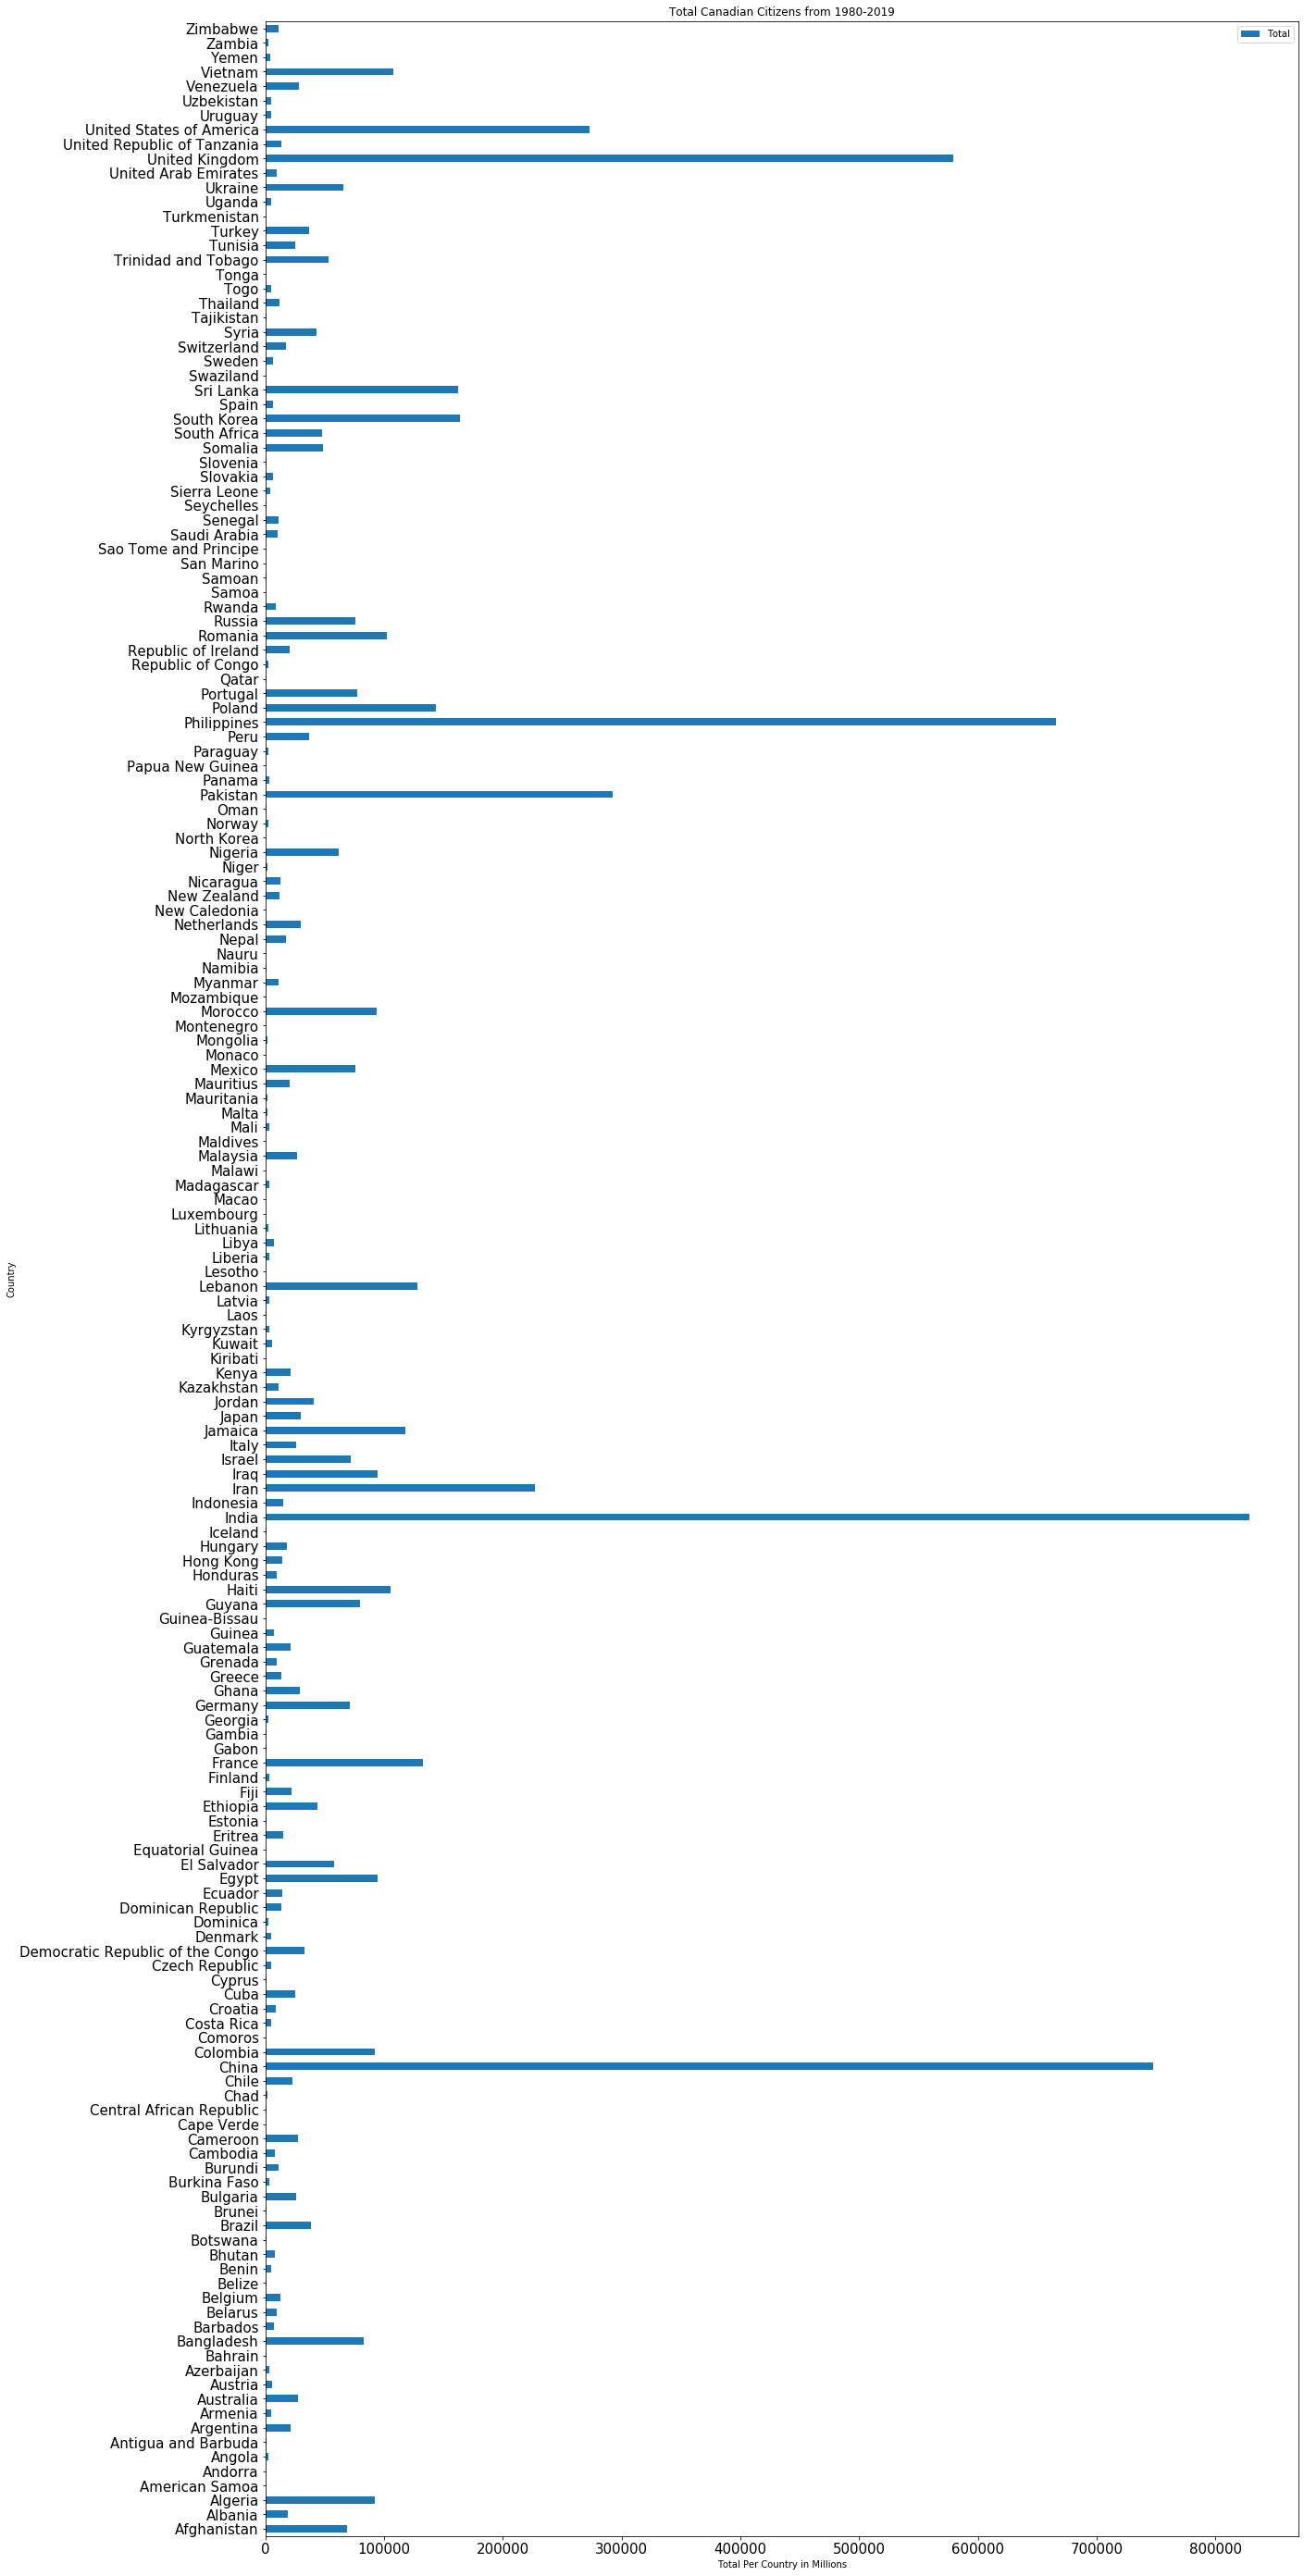

In [13]:

df["Total"] = df.sum(axis = 1)
dftotalcountry = df.drop(dfmulti.iloc[:, 0:40], axis = 1)
pivotedtotalcountry = dftotalcountry.pivot_table(columns = "Country")
pivotedtotalcountry = pivotedtotalcountry.pivot_table (columns = "Total")
ax1 = pivotedtotalcountry.plot(kind="barh", figsize=(20,50), title='Total Canadian Citizens from 1980-2019',fontsize=15)
ax1.set_xlabel("Total Per Country in Millions")

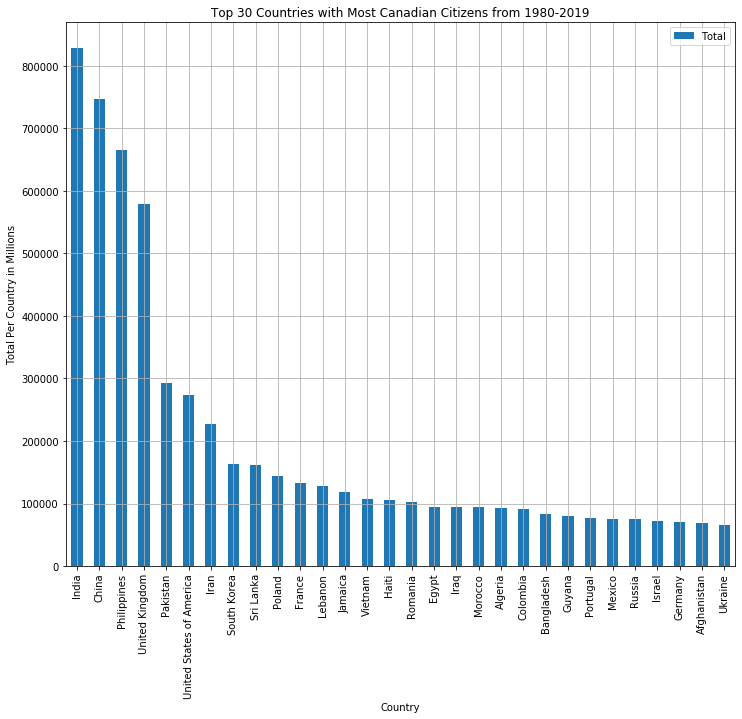

In [14]:
#get top ten countries with most Can Citizens from 1980-2019

ax2 = pivotedtotalcountry.nlargest(30, "Total").plot(kind="bar", figsize=(12,10), title = "Top 30 Countries with Most Canadian Citizens from 1980-2019")
ax2.set_ylabel("Total Per Country in Millions")
ax2.grid()

In [15]:
#making a list of top 20 countries
top20 = pivotedtotalcountry.nlargest(20, "Total")
top20

Total
Country                         
India                     828108
China                     747090
Philippines               665585
United Kingdom            579338
Pakistan                  292359
United States of America  273014
Iran                      226586
South Korea               163972
Sri Lanka                 162236
Poland                    143505
France                    132348
Lebanon                   128059
Jamaica                   117663
Vietnam                   107475
Haiti                     105273
Romania                   102019
Egypt                      94876
Iraq                       94264
Morocco                    93733
Algeria                    92202

In [16]:
top20 = top20.reset_index()

In [17]:
top20list = list(top20["Country"])

In [18]:
#list of countries with top 20 imigrants, to be used later
top20list

['India',
 'China',
 'Philippines',
 'United Kingdom',
 'Pakistan',
 'United States of America',
 'Iran',
 'South Korea',
 'Sri Lanka',
 'Poland',
 'France',
 'Lebanon',
 'Jamaica',
 'Vietnam',
 'Haiti',
 'Romania',
 'Egypt',
 'Iraq',
 'Morocco',
 'Algeria']

# Assess per year
    - datetime
    - total
    - check lag plot and autocorrelation?
    - forecast?

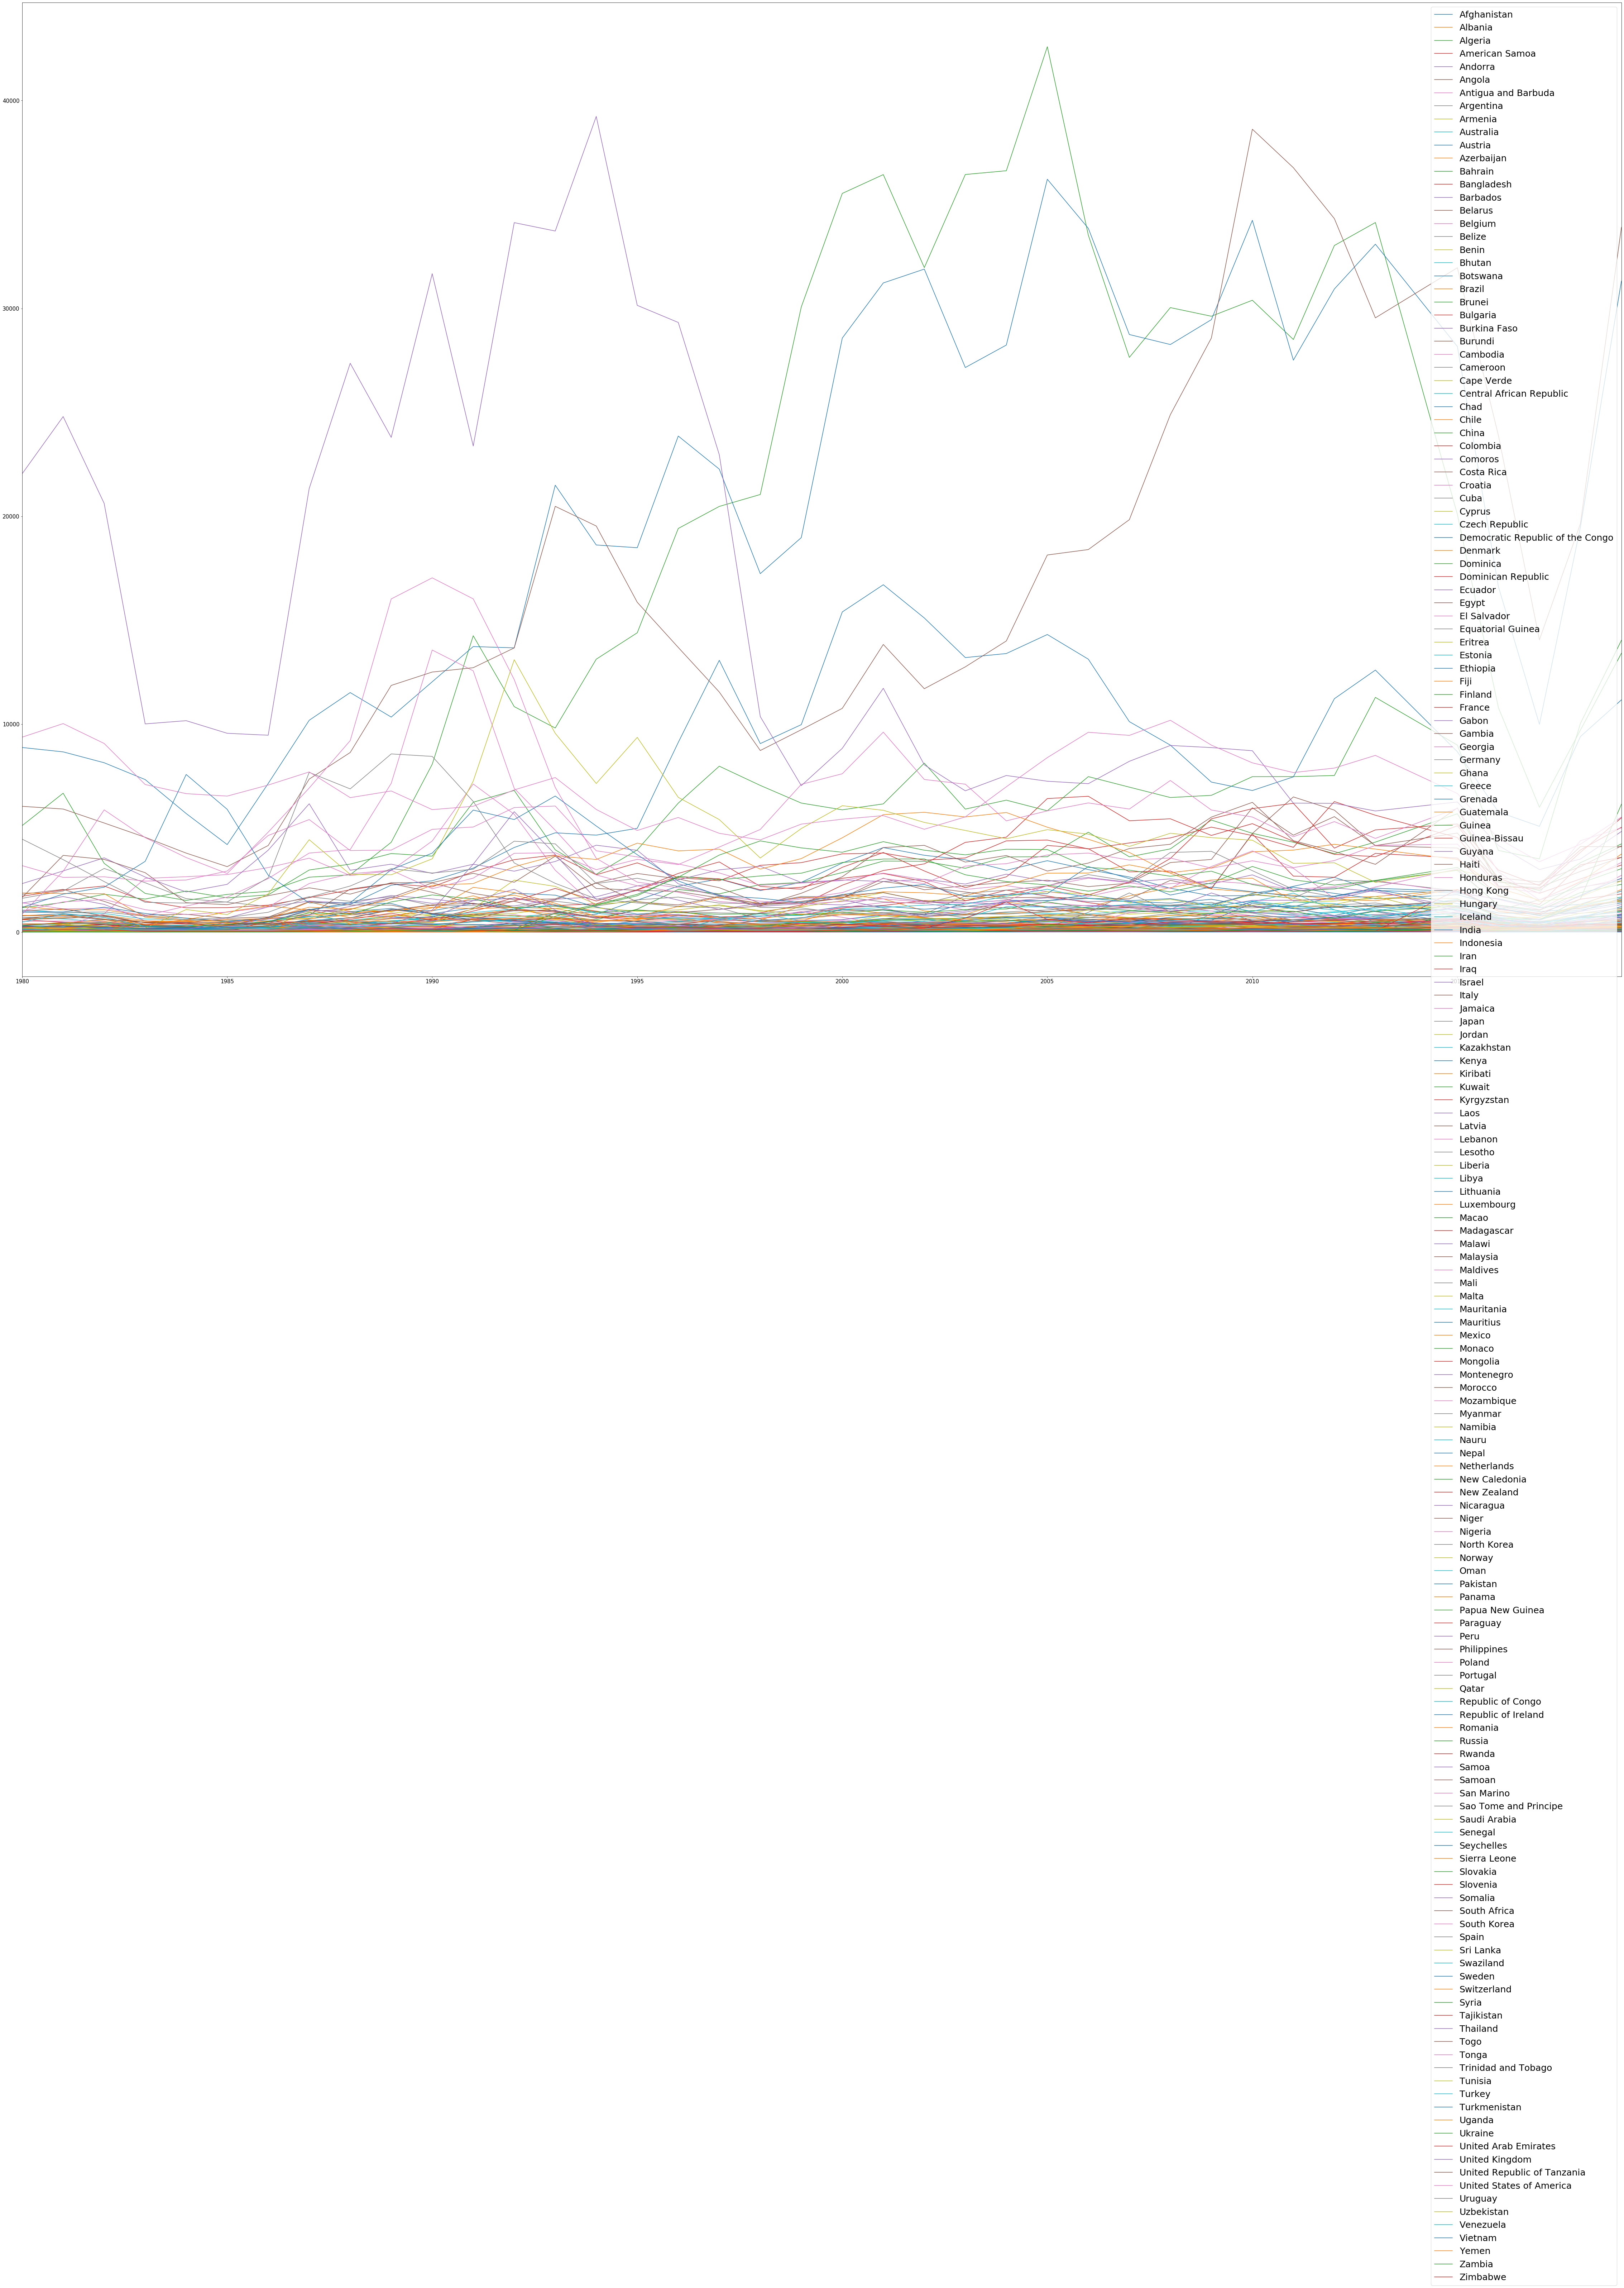

In [19]:
#dropcolumns and resetindex then plot to see rough
dfdropped = df.drop(["Total","Status","Region"],  axis = 1).transpose()
dfdropped.plot(figsize = (80,50),fontsize = 15).legend(prop={"size":25})


Text(0.5, 1.0, 'Top 20 Total New Canadian Citizens')

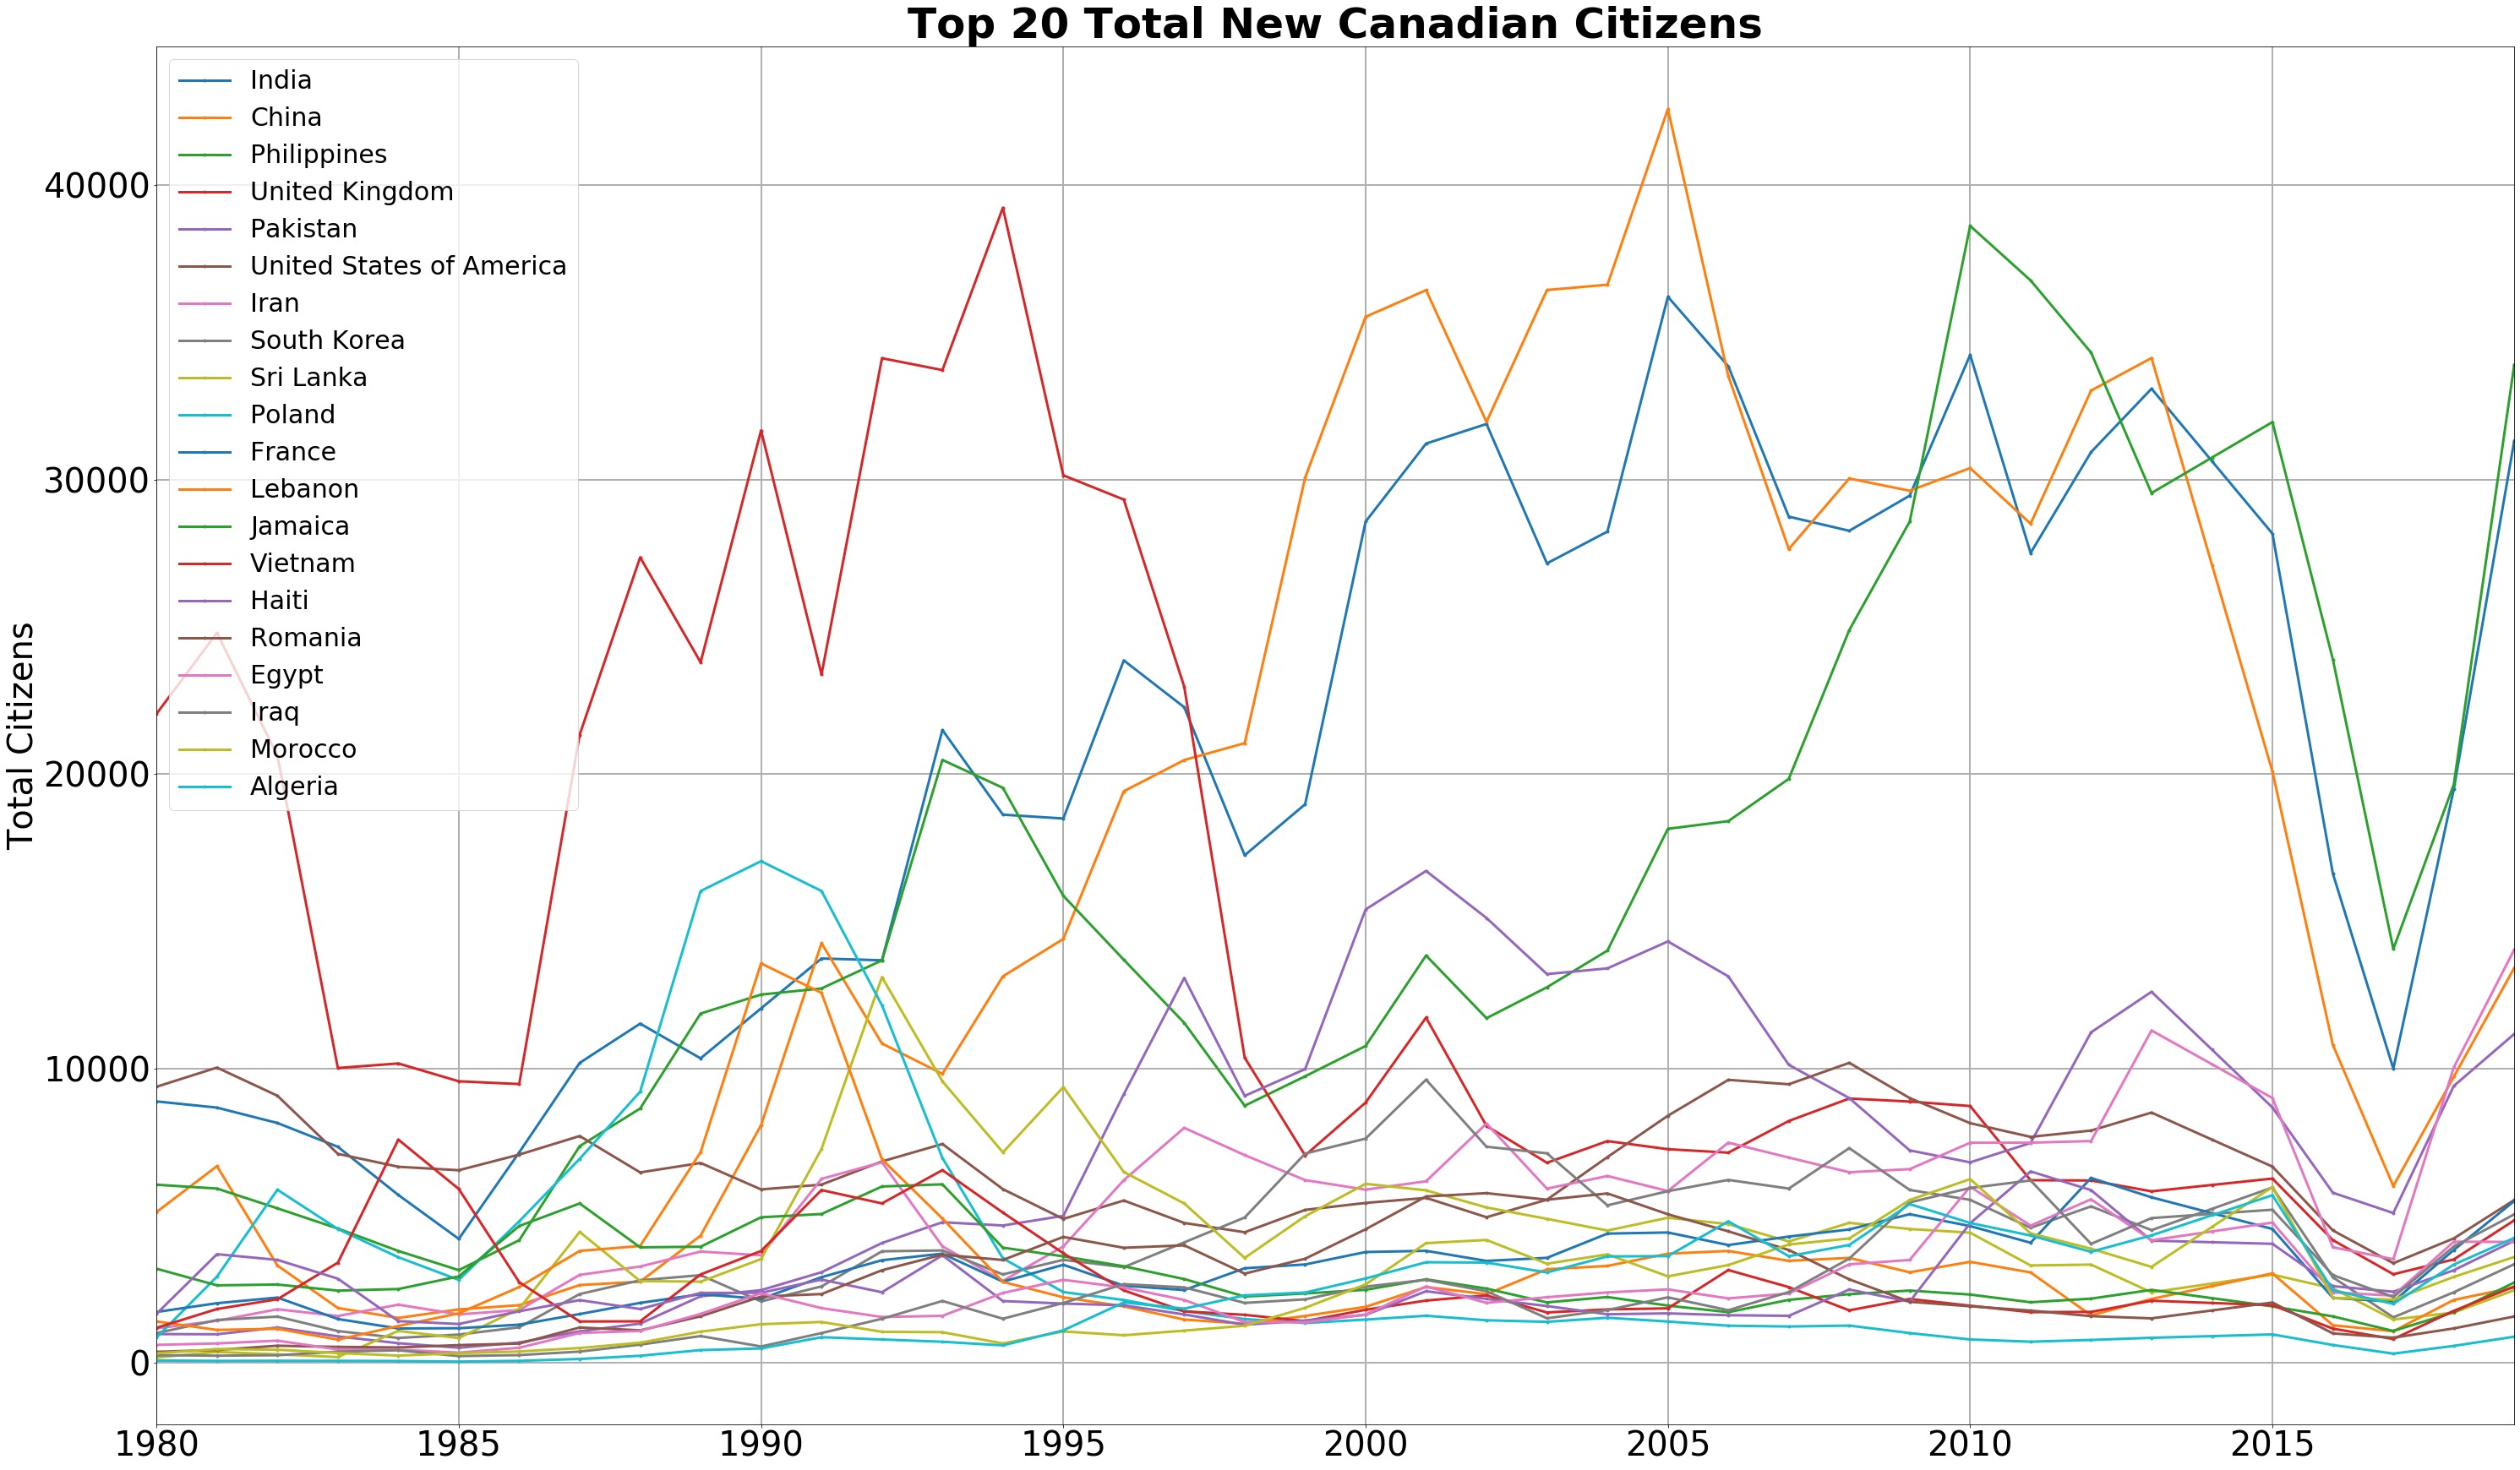

In [20]:
#only top 20 countries of total immigrants 1980-2019 for a cleaner graph
countryplot = dfdropped[top20list].plot(figsize = (50,30), fontsize = 40,marker = ".", alpha = 1, linewidth = 3)
countryplot.set_ylabel('Total Citizens', fontsize=40)
countryplot.legend(prop={"size":30})
countryplot.grid(linewidth=2)
countryplot.set_title('Top 20 Total New Canadian Citizens', fontdict={'fontsize': 50, 'fontweight': 'heavy'} )


Text(0.5, 1.0, 'Top 6 Total New Canadian Citizens')

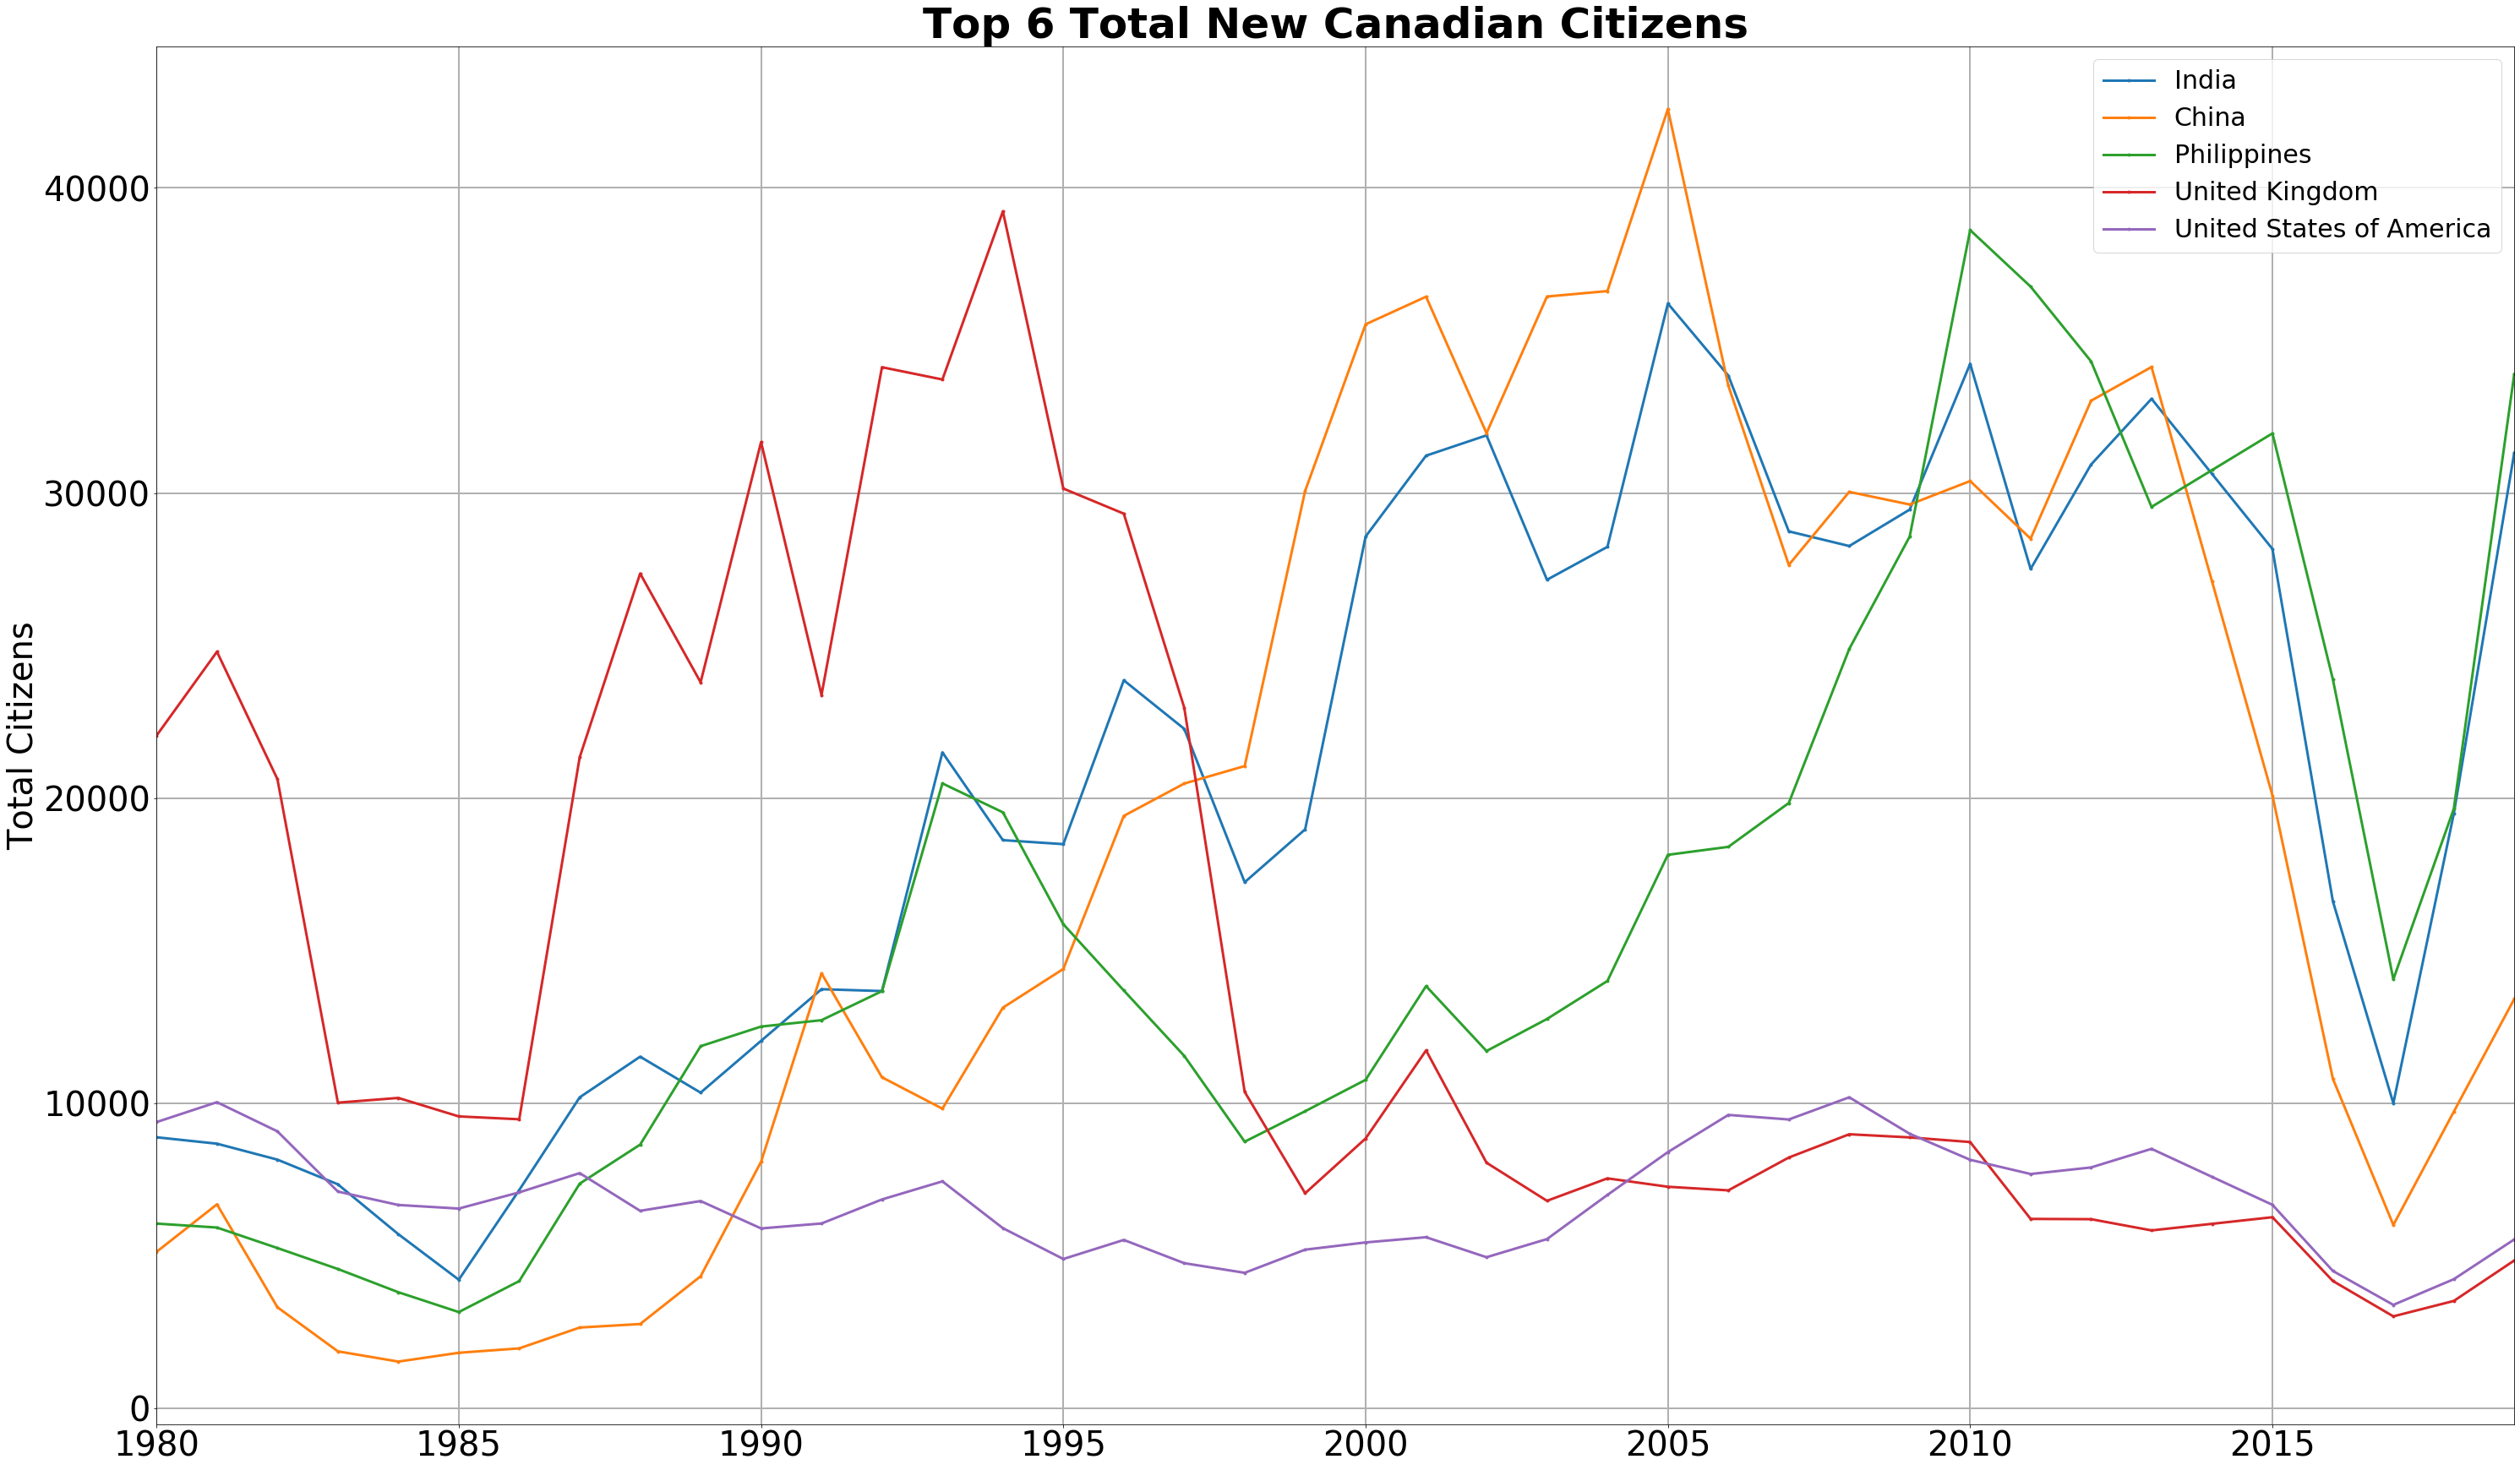

In [21]:
#only top 6 countries of total immigrants 1980-2019 for a cleaner graph


top6list = ['India',
 'China',
 'Philippines',
 'United Kingdom',
 'United States of America']


countryplot = dfdropped[top6list].plot(figsize = (50,30), fontsize = 40,marker = ".", alpha = 1, linewidth = 3)
countryplot.set_ylabel('Total Citizens', fontsize=40)
countryplot.legend(prop={"size":30})
countryplot.grid(linewidth=2)
countryplot.set_title('Top 6 Total New Canadian Citizens', fontdict={'fontsize': 50, 'fontweight': 'heavy'} )

